<a href="https://colab.research.google.com/github/uapdhyaybipul/Computer_vision/blob/main/Sam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


In [39]:
!git clone https://github.com/facebookresearch/segment-anything-2.git
%cd {HOME}/segment-anything-2
!pip install -e .

fatal: destination path 'segment-anything-2' already exists and is not an empty directory.
/content/segment-anything-2
Obtaining file:///content/segment-anything-2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.0 MB/s eta 0:00:00
  Building editable for SAM-2 (pyproject.toml) ... done
  Created wheel for SAM-2: filename=SAM_2-1.0-0.editable-cp310-cp310-linux_x86_64.whl size=13394 sha256=f3fcbedd99503bbd737da2d3f2a3bd0f9ab290ba63e04f2537c523d6ebbe7d56


In [3]:
!wget -q https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_large.pt

In [2]:
!pip install -q supervision jupyter_bbox_widget

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.4/727.4 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.8 MB/s eta 0:00:00


In [1]:
!mkdir -p /content/videos

In [8]:
!ffmpeg -i /content/video.mp4 -q:v 2 -start_number 0 /content/videos/'%05d.jpg'

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision

In [6]:
if torch.cuda.is_available():
    device = torch.device("cuda")
device

device(type='cuda')

In [7]:
import os
os.getcwd()

'/content'

In [18]:
image_list=[]
import os
os.chdir('/content/videos')
os.listdir()
for i in os.listdir():
  image_list.append(i)
  if len(image_list)==10:
    break


print(image_list)

['00552.jpg', '00801.jpg', '00178.jpg', '00451.jpg', '00624.jpg', '00144.jpg', '00559.jpg', '00020.jpg', '00852.jpg', '00002.jpg']


In [23]:
image_list=[os.getcwd()+'/'+image_list[i] for i in range(len(image_list))]

In [31]:
image_list

['/content/videos/00552.jpg',
 '/content/videos/00801.jpg',
 '/content/videos/00178.jpg',
 '/content/videos/00451.jpg',
 '/content/videos/00624.jpg',
 '/content/videos/00144.jpg',
 '/content/videos/00559.jpg',
 '/content/videos/00020.jpg',
 '/content/videos/00852.jpg',
 '/content/videos/00002.jpg']

In [27]:
cd ..

/content


In [1]:
import os

from sam2.build_sam import build_sam2_video_predictor
import torch

sam2_checkpoint = "/content/sam2_hiera_large.pt"
model_cfg = "/configs/sam2/sam2_hiera_l.yaml"

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# Build the predictor
predictor = build_sam2_video_predictor(model_cfg, sam2_checkpoint, device=device, strict=False)

/content/segment-anything-2/sam2/modeling/sam/transformer.py:23: UserWarning: Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.
  OLD_GPU, USE_FLASH_ATTN, MATH_KERNEL_ON = get_sdpa_settings()


In [2]:
def show_mask(mask, ax, obj_id=None, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        cmap_idx = 0 if obj_id is None else obj_id
        color = np.array([*cmap(cmap_idx)[:3], 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


def show_points(coords, labels, ax, marker_size=200):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)


def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))

In [3]:
os.makedirs("Videos")

In [4]:
os.getcwd()

'/content'

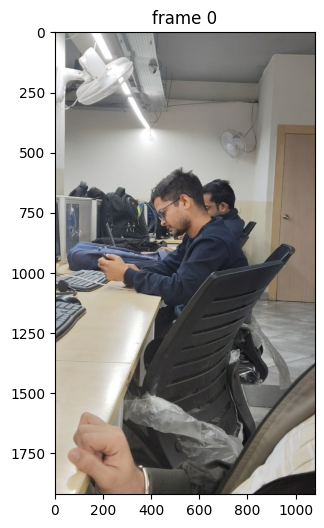

In [7]:
# `video_dir` a directory of JPEG frames with filenames like `<frame_index>.jpg`
import os
import matplotlib.pyplot as plt
from PIL import Image
video_dir = "/content/Videos"

# scan all the JPEG frame names in this directory
frame_names = [
    p for p in os.listdir(video_dir)
    if os.path.splitext(p)[-1] in [".jpg", ".jpeg", ".JPG", ".JPEG"]
]
frame_names.sort(key=lambda p: int(os.path.splitext(p)[0]))

# take a look the first video frame
frame_idx = 0
plt.figure(figsize=(9, 6))
plt.title(f"frame {frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[frame_idx])))

In [31]:
inference_state = predictor.init_state(video_path=video_dir)

frame loading (JPEG): 100%|██████████| 10/10 [00:00<00:00, 15.88it/s]


In [30]:
predictor.reset_state(inference_state)

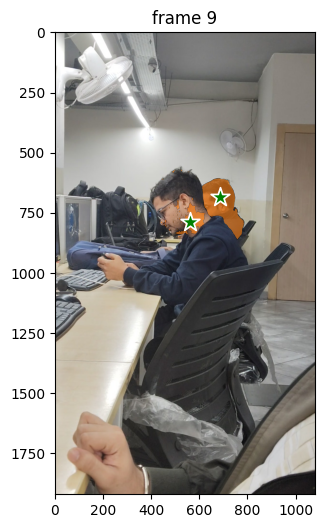

In [32]:
import numpy as np
ann_frame_idx = 9  # the frame index we interact with
ann_obj_id = 1  # give a unique id to each object we interact with (it can be any integers)

# Let's add a positive click at (x, y) = (210, 350) to get started
points = np.array([[560, 790],[685,685]], dtype=np.float32)
# for labels, `1` means positive click and `0` means negative click
labels = np.array([1,1], np.int32)
_, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
    inference_state=inference_state,
    frame_idx=ann_frame_idx,
    obj_id=ann_obj_id,
    points=points,
    labels=labels,
)

# show the results on the current (interacted) frame
plt.figure(figsize=(9, 6))
plt.title(f"frame {ann_frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[ann_frame_idx])))
show_points(points, labels, plt.gca())
show_mask((out_mask_logits[0] > 0.0).cpu().numpy(), plt.gca(), obj_id=out_obj_ids[0])

propagate in video: 100%|██████████| 1/1 [00:00<00:00, 402.64it/s]


KeyError: 0

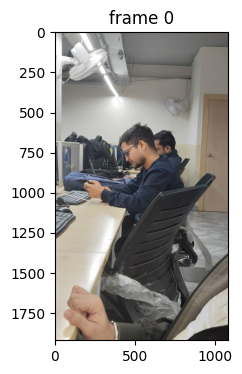

In [33]:
# run propagation throughout the video and collect the results in a dict
video_segments = {}  # video_segments contains the per-frame segmentation results
for out_frame_idx, out_obj_ids, out_mask_logits in predictor.propagate_in_video(inference_state):
    video_segments[out_frame_idx] = {
        out_obj_id: (out_mask_logits[i] > 0.0).cpu().numpy()
        for i, out_obj_id in enumerate(out_obj_ids)
    }

# render the segmentation results every few frames
vis_frame_stride = 2
plt.close("all")
for out_frame_idx in range(0, len(frame_names), vis_frame_stride):
    plt.figure(figsize=(6, 4))
    plt.title(f"frame {out_frame_idx}")
    plt.imshow(Image.open(os.path.join(video_dir, frame_names[out_frame_idx])))
    for out_obj_id, out_mask in video_segments[out_frame_idx].items():
        show_mask(out_mask, plt.gca(), obj_id=out_obj_id)

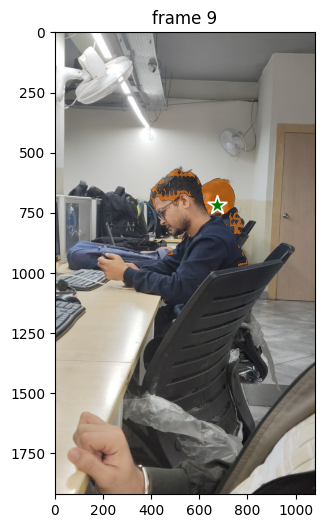

In [19]:
import numpy as np
ann_frame_idx = 9  # the frame index we interact with
ann_obj_id = 2  # give a unique id to each object we interact with (it can be any integers)

# Let's add a positive click at (x, y) = (210, 350) to get started
points = np.array([[675,716]], dtype=np.float32)
# for labels, `1` means positive click and `0` means negative click
labels = np.array([1], np.int32)
_, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
    inference_state=inference_state,
    frame_idx=ann_frame_idx,
    obj_id=ann_obj_id,
    points=points,
    labels=labels,
)



# show the results on the current (interacted) frame
plt.figure(figsize=(9, 6))
plt.title(f"frame {ann_frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[ann_frame_idx])))
show_points(points, labels, plt.gca())
show_mask((out_mask_logits[0] > 0.0).cpu().numpy(), plt.gca(), obj_id=out_obj_ids[0])

propagate in video: 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]


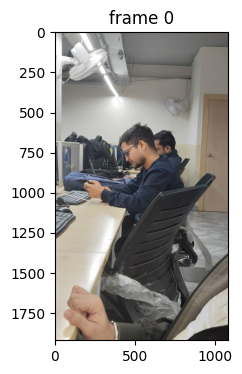

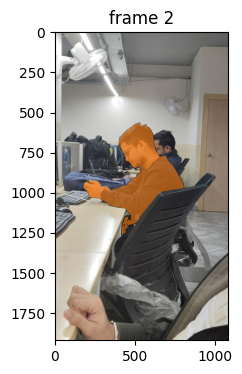

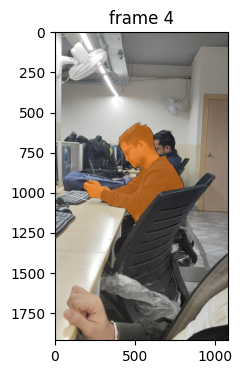

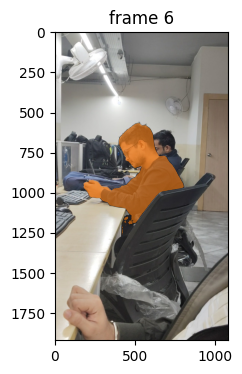

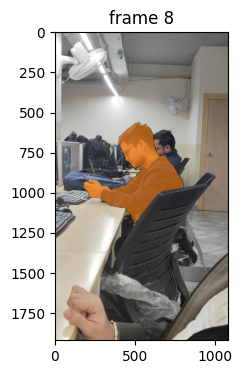

In [22]:
# run propagation throughout the video and collect the results in a dict
video_segments = {}  # video_segments contains the per-frame segmentation results
for out_frame_idx, out_obj_ids, out_mask_logits in predictor.propagate_in_video(inference_state):
    video_segments[out_frame_idx] = {
        out_obj_id: (out_mask_logits[i] > 0.0).cpu().numpy()
        for i, out_obj_id in enumerate(out_obj_ids)
    }

# render the segmentation results every few frames
vis_frame_stride = 2
plt.close("all")
for out_frame_idx in range(0, len(frame_names), vis_frame_stride):
    plt.figure(figsize=(6, 4))
    plt.title(f"frame {out_frame_idx}")
    plt.imshow(Image.open(os.path.join(video_dir, frame_names[out_frame_idx])))
    for out_obj_id, out_mask in video_segments[out_frame_idx].items():
        show_mask(out_mask, plt.gca(), obj_id=out_obj_id)

In [29]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 kB 20.7 MB/s eta 0:00:00


In [32]:
from ultralytics import SAM

# Load a model
model = SAM("sam2.1_b.pt")

# Display model information (optional)
model.info()

# Run inference with bboxes prompt
results = model(image_list[0])

# # Run inference with single point
# results = model(points=[900, 370], labels=[1])

# # Run inference with multiple points
# results = model(points=[[400, 370], [900, 370]], labels=[1, 1])

# # Run inference with multiple points prompt per object
# results = model(points=[[[400, 370], [900, 370]]], labels=[[1, 1]])

# # Run inference with negative points prompt
# results = model(points=[[[400, 370], [900, 370]]], labels=[[1, 0]])

100%|██████████| 154M/154M [00:01<00:00, 125MB/s]


Model summary: 566 layers, 80,850,178 parameters, 80,850,178 gradients

image 1/1 /content/videos/00552.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 9404.9ms
Speed: 119.6ms preprocess, 9404.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12'}
obb: None
orig_img: array([[[158, 159, 157],
        [156, 157, 155],
        [153, 154, 152],
        ...,
        [ 95,  99, 100],
        [ 95,  99, 100],
        [ 95,  99, 100]],

       [[148, 149, 147],
        [151, 152, 150],
        [154, 155, 153],
        ...,
        [ 95,  99, 100],
        [ 95,  99, 100],
        [ 95,  99, 100]],

       [[140, 141, 139],
        [147, 148, 146],
        [154, 155, 153],
        ...,
        [ 96, 100, 101],
        [ 96, 100, 101],
        [ 96, 100, 101]],

       ...,

       [[131, 130, 126],
        [127, 126, 122],
        [124, 123, 119],
        ...,
        [147, 152, 151],
        [147, 152, 151],
        [146, 151, 150]],

       [[134, 133, 

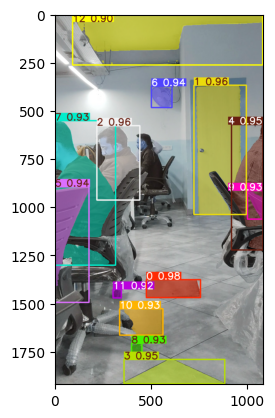

In [36]:
for result in results:
  print(result)
  print(result.masks)
  print(result.boxes)
  plt.imshow(result.plot())
  plt.show()